In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil, math
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import tensorflow as tf

This notebook is a copy of [this](./MaidenVoyage.ipynb) notebook expcept here I increased the size of the validation set.

In [4]:
train_path = os.path.join('chest_xray', 'train')
test_path = os.path.join('chest_xray', 'test')
val_path = os.path.join('chest_xray', 'val')

test_pos_path = os.path.join(test_path, 'PNEUMONIA')
test_neg_path = os.path.join(test_path, 'NORMAL')
val_pos_path = os.path.join(val_path, 'PNEUMONIA')
val_neg_path = os.path.join(val_path, 'NORMAL')

test_pos_names = os.listdir(test_pos_path)
test_neg_names = os.listdir(test_neg_path)

pos_sample_size = math.ceil(0.2*len(test_pos_names))
neg_sample_size = math.ceil(0.2*len(test_neg_names))

test_pos_selected = np.random.choice(test_pos_names, replace=False, size=pos_sample_size)
test_neg_selected = np.random.choice(test_neg_names, replace=False, size=neg_sample_size)

src_pos_imgs = [os.path.join(test_pos_path, name) for name in test_pos_selected]
src_neg_imgs = [os.path.join(test_neg_path, name) for name in test_neg_selected]

val_pos_imgs = [os.path.join(val_pos_path, name) for name in test_pos_selected]
val_neg_imgs = [os.path.join(val_neg_path, name) for name in test_neg_selected]


In [14]:
with open('src_pos_imgs.txt', "w") as file :
    file.write("\n".join(src_pos_imgs))
with open('src_neg_imgs.txt', "w") as file :
    file.write("\n".join(src_neg_imgs))
with open('val_pos_imgs.txt', "w") as file :
    file.write("\n".join(val_pos_imgs))
with open('val_neg_imgs.txt', "w") as file :
    file.write("\n".join(val_neg_imgs))

Run cell below to add images to validation set

In [18]:
for src, dest in zip(src_pos_imgs, val_pos_imgs):
    shutil.move(src, dest)
for src, dest in zip(src_neg_imgs, val_neg_imgs):
    shutil.move(src, dest)

Run cell below to take images back from validation set

In [15]:
for src, dest in zip(src_pos_imgs, val_pos_imgs):
    shutil.move(dest, src)
for src, dest in zip(src_neg_imgs, val_neg_imgs):
    shutil.move(dest, src)

In [5]:
datagen = ImageDataGenerator()

train_gen = datagen.flow_from_directory(train_path)
test_gen = datagen.flow_from_directory(test_path)
val_gen = datagen.flow_from_directory(val_path)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


In [6]:
opt = SGD(learning_rate=1*10**-5)

`model.fit_generator(train_gen, validation_data=val_gen)`

In [17]:
def visualize_training_results(history):
    """Function that graphs and displays both loss and accuracy for a neural networks history.
    Orginal code from Deeper-Neural-Networks-lab"""
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [22]:
def baseline_model(image_shape):
    model_layers = [
        layers.Input(image_shape),
        layers.Flatten(),
        layers.Dense(24, activation='relu'),
        layers.Dense(2, activation='sigmoid')
    ]
    model = Sequential(model_layers)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [23]:

baseline_model = baseline_model(train_gen.image_shape)
results_1 = baseline_model.fit(train_gen, validation_data=val_gen, epochs=25)

Epoch 1/25
163/163 [==============================] - 85s 517ms/step - loss: 4.5416 - accuracy: 0.7412 - val_loss: 0.6938 - val_accuracy: 0.6099
Epoch 2/25
163/163 [==============================] - 83s 509ms/step - loss: 0.6932 - accuracy: 0.7431 - val_loss: 0.6931 - val_accuracy: 0.6099
Epoch 3/25
163/163 [==============================] - 82s 501ms/step - loss: 0.6930 - accuracy: 0.7431 - val_loss: 0.6934 - val_accuracy: 0.6099
Epoch 4/25
163/163 [==============================] - 80s 490ms/step - loss: 0.6929 - accuracy: 0.7431 - val_loss: 0.6935 - val_accuracy: 0.6099
Epoch 5/25
163/163 [==============================] - 79s 486ms/step - loss: 0.6930 - accuracy: 0.7431 - val_loss: 0.6930 - val_accuracy: 0.6099
Epoch 6/25
163/163 [==============================] - 79s 486ms/step - loss: 0.6928 - accuracy: 0.7431 - val_loss: 0.6930 - val_accuracy: 0.6099
Epoch 7/25
163/163 [==============================] - 80s 490ms/step - loss: 0.6929 - accuracy: 0.7431 - val_loss: 0.6930 - val_ac

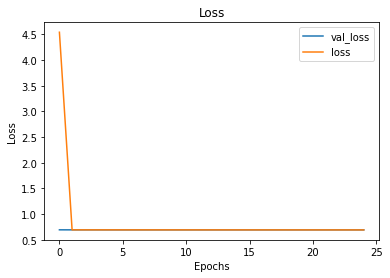

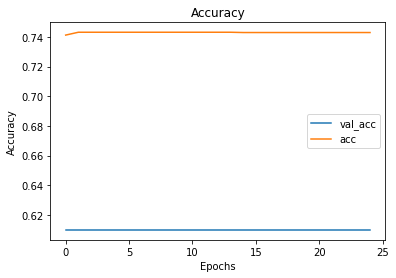

In [24]:
visualize_training_results(results_1)

In [25]:
def conv_1(image_shape):
    these_layers = [
        layers.Input(image_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='sigmoid')
    ]
    model = Sequential(these_layers)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
model_2 = conv_1(train_gen.image_shape)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 516128)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16516128  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 16,517,090
Trainable params: 16,517,090
Non-trainable params: 0
_________________________________________________________________


In [27]:
results_2 = model_2.fit(train_gen, validation_data=val_gen, epochs=25)

Epoch 1/25
163/163 [==============================] - 145s 874ms/step - loss: 243.5777 - accuracy: 0.8146 - val_loss: 12.2136 - val_accuracy: 0.7447
Epoch 2/25
163/163 [==============================] - 139s 849ms/step - loss: 0.9749 - accuracy: 0.8838 - val_loss: 9.6292 - val_accuracy: 0.7518
Epoch 3/25
163/163 [==============================] - 137s 835ms/step - loss: 0.6316 - accuracy: 0.8974 - val_loss: 9.7324 - val_accuracy: 0.7801
Epoch 4/25
163/163 [==============================] - 137s 837ms/step - loss: 0.4563 - accuracy: 0.9095 - val_loss: 9.8053 - val_accuracy: 0.8014
Epoch 5/25
163/163 [==============================] - 134s 821ms/step - loss: 0.1814 - accuracy: 0.9206 - val_loss: 9.5397 - val_accuracy: 0.7518
Epoch 6/25
163/163 [==============================] - 134s 820ms/step - loss: 0.0953 - accuracy: 0.9350 - val_loss: 8.5770 - val_accuracy: 0.7801
Epoch 7/25
163/163 [==============================] - 137s 837ms/step - loss: 0.0761 - accuracy: 0.9480 - val_loss: 9.813

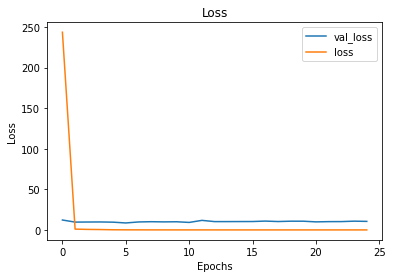

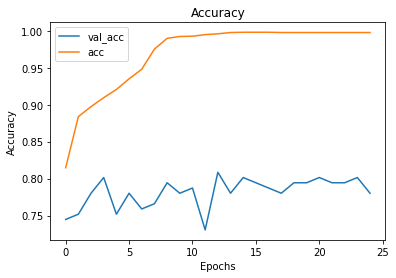

In [28]:
visualize_training_results(results_2)

In [29]:
def AlexNet(image_shape):
    model_layers = [
        layers.Input(image_shape),
        layers.Conv2D(24, (11,11), activation = 'relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3,3)),
        layers.Conv2D(64, (5,5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3,3)),
        layers.Conv2D(96, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(96, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3,3)),
        layers.Flatten(),
        layers.Dense(192, activation='relu'),
        layers.Dropout(.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(.3),
        layers.Dense(2, activation='sigmoid')
    ]
    
    model = Sequential(model_layers)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [30]:
model_3 = AlexNet(train_gen.image_shape)
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 246, 246, 24)      8736      
_________________________________________________________________
batch_normalization (BatchNo (None, 246, 246, 24)      96        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 82, 82, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 64)        38464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 82, 82, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 96)       

In [31]:
results_3 = model_3.fit(train_gen, validation_data=val_gen, epochs=25)

Epoch 1/25
163/163 [==============================] - 876s 5s/step - loss: 1.0879 - accuracy: 0.4291 - val_loss: 0.6983 - val_accuracy: 0.5603
Epoch 2/25
163/163 [==============================] - 866s 5s/step - loss: 1.0074 - accuracy: 0.4624 - val_loss: 0.7086 - val_accuracy: 0.6241
Epoch 3/25
163/163 [==============================] - 856s 5s/step - loss: 0.9840 - accuracy: 0.4799 - val_loss: 0.6895 - val_accuracy: 0.6596
Epoch 4/25
163/163 [==============================] - 853s 5s/step - loss: 0.9294 - accuracy: 0.5205 - val_loss: 0.6781 - val_accuracy: 0.6667
Epoch 5/25
163/163 [==============================] - 865s 5s/step - loss: 0.8845 - accuracy: 0.5562 - val_loss: 0.6589 - val_accuracy: 0.7234
Epoch 6/25
163/163 [==============================] - 860s 5s/step - loss: 0.8800 - accuracy: 0.5537 - val_loss: 0.6504 - val_accuracy: 0.6950
Epoch 7/25
163/163 [==============================] - 856s 5s/step - loss: 0.8521 - accuracy: 0.5836 - val_loss: 0.6547 - val_accuracy: 0.6667

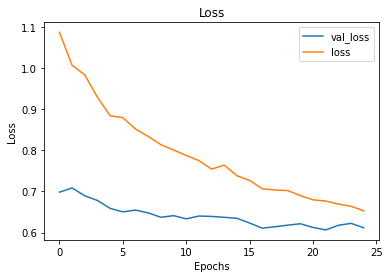

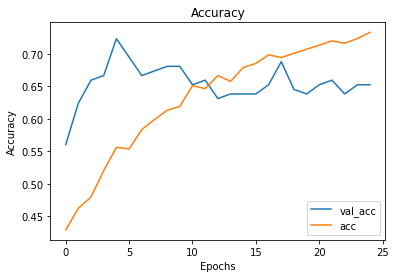

In [32]:
visualize_training_results(results_3)

In [8]:
from tensorflow.keras import Model

def SimpleResNet(image_shape):
    input_layer = layers.Input(image_shape)
    
    X = layers.Conv2D(16, (3,3), activation='relu')(input_layer)
    X = layers.BatchNormalization()(X)
    
    X_shortcut = X
    
    X = layers.Conv2D(16, (3,3), padding='same', activation='relu')(X)
    X = layers.BatchNormalization()(X)
    
    X = layers.Add()([X, X_shortcut]) #Skip Connection
    X = layers.Activation('relu')(X)
    X = layers.Flatten()(X)
    X = layers.Dense(2, activation='sigmoid')(X)
    
    model = Model(inputs=input_layer, outputs=X, name='ResNet')
    
    model.compile(loss='binary_crossentropy',
                 optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [9]:
model_4 = SimpleResNet(train_gen.image_shape)
model_4.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 254, 254, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 254, 254, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 254, 254, 16) 2320        batch_normalization[0][0]        
_____________________________________________________________________________________________

In [11]:
results_4 = model_4.fit(train_gen, validation_data=val_gen, epochs=8)

Epoch 1/8
163/163 [==============================] - 273s 2s/step - loss: 0.1243 - accuracy: 0.9649 - val_loss: 0.8970 - val_accuracy: 0.7376
Epoch 2/8
163/163 [==============================] - 275s 2s/step - loss: 0.1120 - accuracy: 0.9695 - val_loss: 0.8703 - val_accuracy: 0.7660
Epoch 3/8
163/163 [==============================] - 279s 2s/step - loss: 0.1020 - accuracy: 0.9735 - val_loss: 0.9174 - val_accuracy: 0.7518
Epoch 4/8
163/163 [==============================] - 283s 2s/step - loss: 0.0936 - accuracy: 0.9772 - val_loss: 0.8982 - val_accuracy: 0.7801
Epoch 5/8
163/163 [==============================] - 280s 2s/step - loss: 0.0869 - accuracy: 0.9789 - val_loss: 0.9292 - val_accuracy: 0.7589
Epoch 6/8
163/163 [==============================] - 284s 2s/step - loss: 0.0804 - accuracy: 0.9812 - val_loss: 0.9000 - val_accuracy: 0.7730
Epoch 7/8
163/163 [==============================] - 282s 2s/step - loss: 0.0751 - accuracy: 0.9831 - val_loss: 0.9554 - val_accuracy: 0.7589
Epoch 

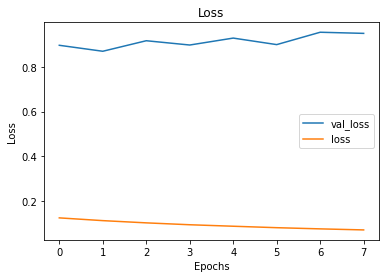

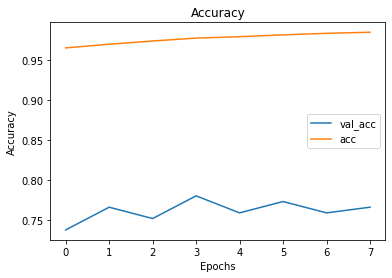

In [12]:
visualize_training_results(results_4)